# Examen Final - Imagenes Mosaíco
## Universidad Peruana de Ciencias Aplicadas 
### CC53 - Procesamiento de Imágenes
### Docente: Pablo Fonseca <pcsipfon@upc.edu.pe>
### Alumno: Sergio Villarruel <u201714083@upc.edu.pe>
### Video: https://youtu.be/6v8zuQOeOZ8
### Dataset: https://drive.google.com/drive/folders/1wYpiGfdqs5Ez3dyOVVp_TwMBPxsRDhLj?usp=sharing


"Un mosaico de fotos es un grupo de imágenes unidas que vistas de cerca las veríamos como imágenes individuales muy juntas una al lado de la otra pero que vistas desde lejos forman una imagen nueva."

![texto alternativo](https://www.geekets.com/wp-content/uploads/2008/09/mario_print1.jpg)

Importamos las librerias principales para empezar a trabajar

In [ ]:
import numpy as np
import pandas as pd  
import cv2
#from skimage.io import imread
from skimage.io import imsave
#from cv2 import imread
from PIL import Image
import matplotlib.pyplot as plt

## Imagenes material para el mosaico

Ya que las imagenes tienen una continuidad en el nombre se crea un algoritmo para leer cada una de estas

In [ ]:
dataset = []
for i in range(1,2016):
    try:
        filename = "/content/drive/My Drive/Universidad/PDIdata/"+str(i)+".png"
        img = Image.open(filename)
        img = img.crop((0,0,35,35))
        dataset.append(img)
    except:
        pass
print("El dataset contiene",len(dataset),"imagenes")

El dataset contiene 2015 imagenes


Es importante etiquetar las imagenes recolectadas para que tengan un "color" definido o dominante

In [ ]:
def color_frecuente(img):
    w, h = img.size
    pixels = img.getcolors(w*h)
    pixel_frecuente = pixels[0]
    for count, color in pixels:
        if count > pixel_frecuente[0]:
             pixel_frecuente = color 
    if len(pixel_frecuente) == 2:
        return pixel_frecuente[1]
    else:
        return pixel_frecuente

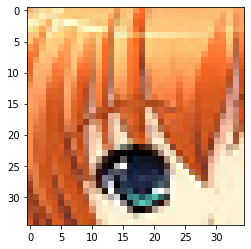

In [ ]:
plt.imshow(dataset[300])
plt.show()

In [ ]:
print("Color dominante: ",color_frecuente(dataset[300]))

Color dominante:  (253, 191, 115)


## "Mosaico"-rización

Se carga una imagen de internet como imagen de referencia a la cual se le aplicará el efecto "mosaico"

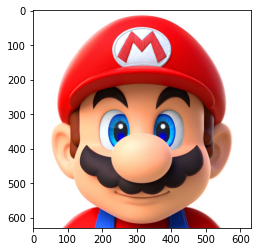

In [ ]:
import requests
from io import BytesIO
url = "https://steemitimages.com/DQmfYjF8Azi8Dcn9s5t6QMdukEL45zMoDee5uMCkuNCPSzD/tree-2597733_960_720.jpg" 
response = requests.get(url)
ref_img = Image.open(BytesIO(response.content))
plt.imshow(ref_img)

Se puede observar que la imagen tiene muchos colores, así que tenemos que disminuirlo para poder estandarizar colores

In [ ]:
w,h = ref_img.size
pixels = ref_img.getcolors(w*h)
colores = []
for count, color in pixels:
    colores.append(color)
print("La imagen tiene",len(colores),"colores")

La imagen tiene 77205 colores


Para esto hacemos uso del algoritmo KMeans, empezamos por hacer un resize a la imagen, de esta manera podemos agrupar de mejor manera los colores.

In [ ]:
import skimage
from skimage.io import imread
from skimage.transform import rescale, resize
from sklearn.cluster import KMeans

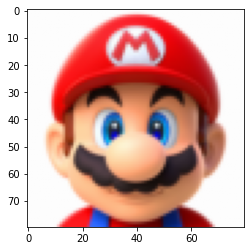

In [ ]:
height = 80
width = 80 
test_img = np.array(ref_img)
im_target = resize(test_img,(height, width))
plt.imshow(im_target)
plt.show()

Se aplica el algoritmo de Kmeans con K como el número deseado de colores para la imagen

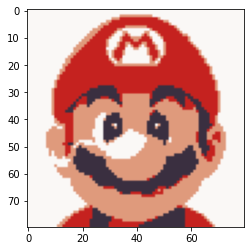

In [ ]:
k = 4 
h,w,c = im_target.shape
new_target = im_target.reshape(h*w,c)
k_means = KMeans(n_clusters=k).fit(new_target)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
target2 = centroides[etiquetas]
cuanti_im = target2.reshape(h,w,c)
plt.imshow(cuanti_im)
plt.show()

Cómo se puede obeservar utilizandoe el algoritmo de detección de colores anterior, sabemos que sólo tiene 4 colores

La imagen tiene 4 colores


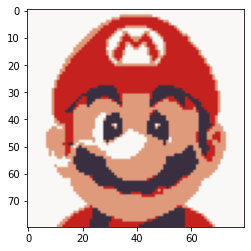

In [ ]:
test_img = Image.fromarray((cuanti_im * 255).astype(np.uint8))
w,h = test_img.size
pixels = test_img.getcolors(w*h)
colores = []
for count, color in pixels:
    colores.append(color)
print("La imagen tiene",len(colores),"colores")
plt.imshow(test_img)
plt.show()

## Mapeo de Colores con las imagenes material

Se elabora un algoritmo para saber si dada una imagen con una etiqueta rgb, es cercano a uno de los colores de la imagen, utilizando como métrica la distancia ecludiana

In [ ]:
def color_cercano(rgb,colores):
    distancia = None
    cercano = None
    for i, color in enumerate(colores):
        dist = ((rgb[0] - color[0])**2 + (rgb[1] - color[1])**2 + (rgb[2] - color[2])**2 )
        if distancia is None:
            cercano = i
            distancia = dist
        if dist < distancia:
            cercano = i
            distancia = dist
    return cercano

Utilizando el algoritmo anterior se mapean las imagenes para cada color de la imagen

In [ ]:
from itertools import cycle
resultados = {i: [] for i in range(len(colores))}

for i in range(len(dataset)):
    rgb = color_frecuente(dataset[i])
    resultados[color_cercano(rgb, colores)].append(dataset[i])

for k in resultados.keys():
    resultados[k] = cycle(resultados[k])

In [ ]:
for key in resultados:
    print(key,resultados[key])

0 [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297D7898>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297D7A90>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297D7C88>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F0336DDA7F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03298D6F98>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F032966A320>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297E6550>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297E6898>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297E6E80>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03298015F8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297F8DD8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x7F03297EE4A8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB s

Se compara el pixel con imagen con etiqueta de color más cercana al pixel. Para empezar a generar la imagen mosaico

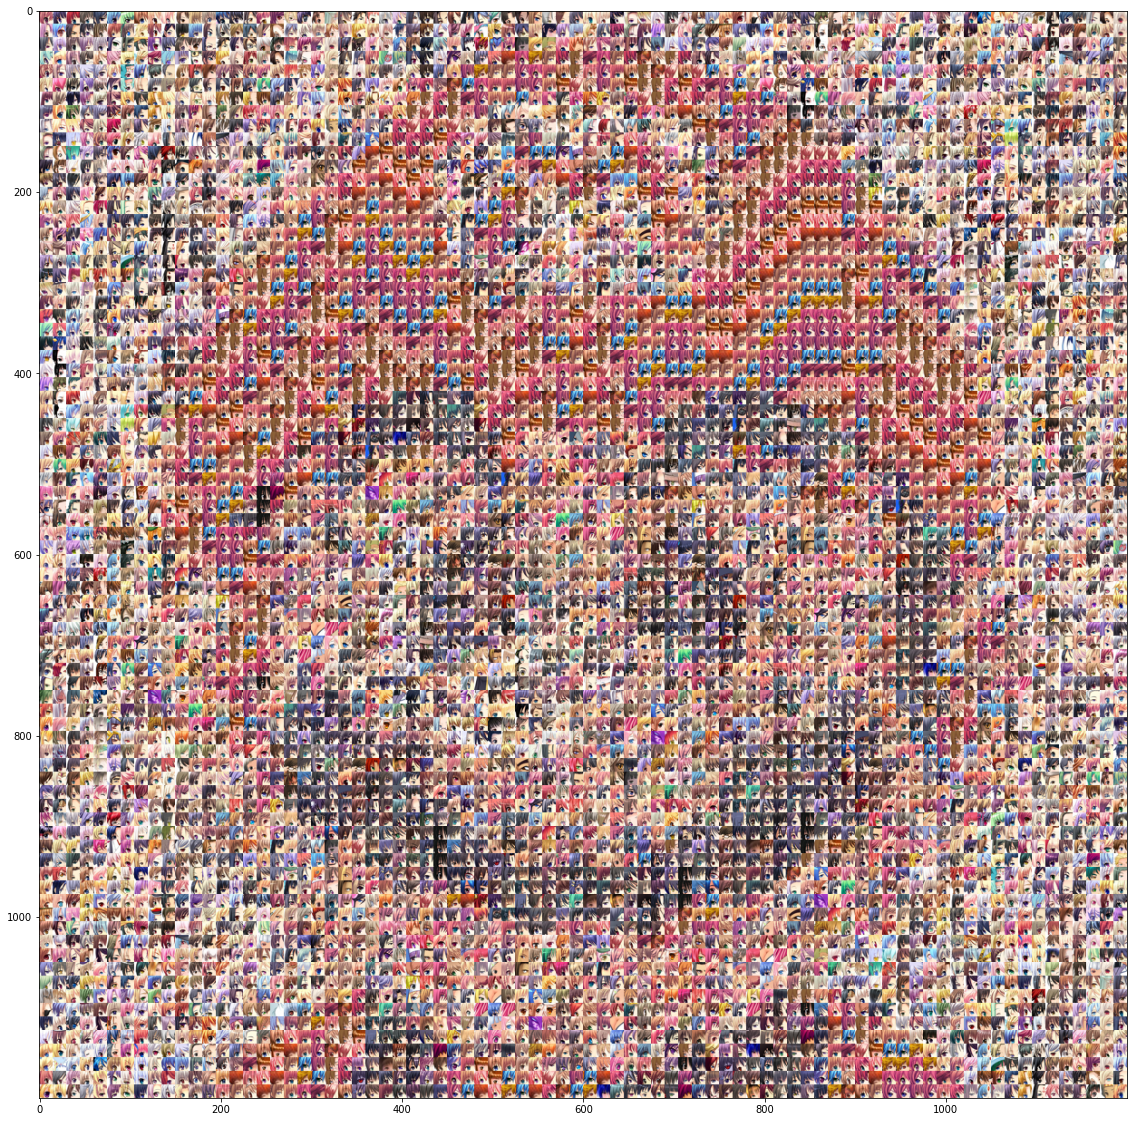

In [ ]:
mosaico_img = test_img.resize((w * 15, h * 15))
pixels = test_img.load()
for x in range(width):
    for y in range(height):
        rgb = pixels[x, y]
        i = color_cercano(rgb, colores)
        im = next(resultados[i]).resize((15, 15))
        mosaico_img.paste(im, (x * 15, y * 15))
plt.figure(figsize=(20,20))
plt.imshow(mosaico_img)
plt.show()
#bg_img.save("resultado.png")

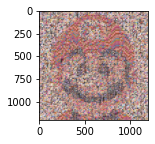

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(mosaico_img)
plt.show()

In [ ]:
def crear_mosaico(img,n_colores,height,width):
    test_img = np.array(img)
    im_target = resize(test_img,(height, width))

    h,w,c = im_target.shape
    new_target = im_target.reshape(h*w,c)
    k_means = KMeans(n_clusters=n_colores).fit(new_target)
    centroides = k_means.cluster_centers_
    etiquetas = k_means.labels_
    target2 = centroides[etiquetas]
    cuanti_im = target2.reshape(h,w,c)

    test_img = Image.fromarray((cuanti_im * 255).astype(np.uint8))
    w,h = test_img.size
    pixels = test_img.getcolors(w*h)
    colores = []
    for count, color in pixels:
        colores.append(color)

    resultados = {i: [] for i in range(len(colores))}

    for i in range(len(dataset)):
        rgb = color_frecuente(dataset[i])
        resultados[color_cercano(rgb, colores)].append(dataset[i])

    for k in resultados.keys():
        resultados[k] = cycle(resultados[k])

    mosaico_img = test_img.resize((w * 30, h * 30))
    pixels = test_img.load()
    try:
        for x in range(width):
            for y in range(height):
                rgb = pixels[x, y]
                i = color_cercano(rgb, colores)
                im = next(resultados[i]).resize((30, 30))
                mosaico_img.paste(im, (x * 30, y * 30))
    except:
        print("No son suficientes las imagenes en la base de datos para crear esa imagen")
        return 0
    return mosaico_img

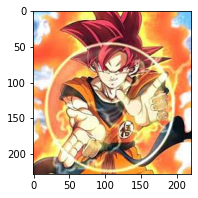

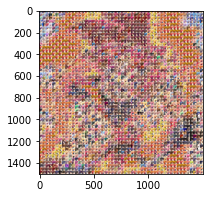

In [ ]:
#@title Formulario para la creación de mosaicos {run: 'auto'}
# 7 https://media.vandal.net/i/1280x1280/58489/super-smash-bros-ultimate-201862017259_9.jpg
# 10 https://i.pinimg.com/originals/67/15/2d/67152d85626bbea516c03b173901d200.jpg
# 4 https://steemitimages.com/DQmfYjF8Azi8Dcn9s5t6QMdukEL45zMoDee5uMCkuNCPSzD/tree-2597733_960_720.jpg
# 3 https://lh3.googleusercontent.com/cZekUlhBmFloSVLC_i-5D4UeYH0Wzu2UwchEv0jSWVdzmRZVsmvk8XSaRrzvdTj2r-M
# 6 https://vignette.wikia.nocookie.net/super-smash-flash/images/9/97/SSF2_Kirby.png/revision/latest/top-crop/width/360/height/450?cb=20180525003913&path-prefix=es
# 2 https://pbs.twimg.com/profile_images/558013171298877443/7swAUJkQ_400x400.png
# 5 https://images-na.ssl-images-amazon.com/images/I/51B3S%2B6%2B3vL._AC_UX385_.jpg
# 4 https://www.informador.mx/__export/1564699763356/sites/elinformador/img/2019/08/01/spiderman_crop1564699074999.jpg_423682103.jpg
# 20 https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSgSNTtr58guC5vvvkC1YKKv1DM9htbFpatgg&usqp=CAU
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSgSNTtr58guC5vvvkC1YKKv1DM9htbFpatgg&usqp=CAU" #@param {type:"string"}
response = requests.get(url)
ref_img = Image.open(BytesIO(response.content))

n_colores =   20#@param {type:"integer"}
mosaico_img = crear_mosaico(ref_img,n_colores,50,50)
if mosaico_img != 0:
    plt.figure(figsize=(3,3))
    plt.imshow(ref_img)
    plt.show()

    plt.figure(figsize=(3,3))
    plt.imshow(mosaico_img)
    plt.show()

In [ ]:
mosaico_img.save("resultado.png")